In [23]:
import pandas as pd

In [24]:
gpu_model = 'h100v2'
ai_model = '_mixed'
power_limit = '70'
inference_load = pd.read_csv(f"inference_load.agent_{gpu_model}{ai_model}.csv", parse_dates=['StartTime', 'EndTime'])
nvidia_log = pd.read_csv(f"nvidia_smi_log.agent_{gpu_model}{ai_model}.csv", parse_dates=['timestamp'])
default_inference_load = pd.read_csv(f"inference_load.default_{gpu_model}{ai_model}.csv", parse_dates=['StartTime', 'EndTime'])
default_nvidia_log = pd.read_csv(f"nvidia_smi_log.default_{gpu_model}{ai_model}.csv", parse_dates=['timestamp'])
power_inference_load = pd.read_csv(f"inference_load.power_{power_limit}_{gpu_model}{ai_model}.csv", parse_dates=['StartTime', 'EndTime'])
power_nvidia_log = pd.read_csv(f"nvidia_smi_log.power_{power_limit}_{gpu_model}{ai_model}.csv", parse_dates=['timestamp'])

In [25]:
#get total timespace from inference_load; we will only count from start of first inference to end of last
end_time = inference_load['EndTime'].max() 
start_time = inference_load['StartTime'].min()
total_time = end_time - start_time  
print(f"Total time (agent): {total_time}")

Total time (agent): 0 days 00:03:47.973000


In [26]:
#get total timespace from inference_load; we will only count from start of first inference to end of last
default_end_time = default_inference_load['EndTime'].max() 
default_start_time = default_inference_load['StartTime'].min()
default_total_time = default_end_time - default_start_time  
print(f"Total time (default): {default_total_time}")

Total time (default): 0 days 00:03:29.311000


In [27]:
power_end_time = power_inference_load['EndTime'].max() 
power_start_time = power_inference_load['StartTime'].min()
power_total_time = power_end_time - power_start_time  
print(f"Total time (power): {power_total_time}")

Total time (power): 0 days 00:03:45.106000


In [28]:
#filter nvidia log to only include data from start of first inference to end of last
nvidia_log = nvidia_log[(nvidia_log['timestamp'] >= start_time) & (nvidia_log['timestamp'] <= end_time)]
default_nvidia_log = default_nvidia_log[(default_nvidia_log['timestamp'] >= default_start_time) & (default_nvidia_log['timestamp'] <= default_end_time)]
power_nvidia_log = power_nvidia_log[(power_nvidia_log['timestamp'] >= power_start_time) & (power_nvidia_log['timestamp'] <= power_end_time)]

In [29]:
#calculate total watt-seconds of each row
nvidia_log['time_since_last'] = nvidia_log['timestamp'].diff().dt.total_seconds()
nvidia_log['watt_seconds'] = nvidia_log['power.draw(W)'] * nvidia_log['time_since_last']
nvidia_log.head()

 


,timestamp,index,name,utilization.gpu(%),utilization.memory(%),memory.total(MiB),memory.free(MiB),memory.used(MiB),temperature.gpu(C),gpu.frequency(Ghz),vram.frequency(Ghz),power.limit(W),power.draw(W),time_since_last,watt_seconds
34,2024-12-16 17:08:05.059,0,NVIDIA H100 80GB HBM3,0,0,81559,26053,54943,31,345,2619,700.0,73.71,NaN,NaN
35,2024-12-16 17:08:05.194,0,NVIDIA H100 80GB HBM3,0,0,81559,26053,54943,31,345,2619,700.0,71.51,0.135,9.65385
36,2024-12-16 17:08:05.330,0,NVIDIA H100 80GB HBM3,0,0,81559,26053,54943,31,345,2619,700.0,75.65,0.136,10.28840
37,2024-12-16 17:08:05.472,0,NVIDIA H100 80GB HBM3,67,6,81559,26053,54943,32,345,2619,700.0,86.28,0.142,12.25176
38,2024-12-16 17:08:05.608,0,NVIDIA H100 80GB HBM3,93,9,81559,26053,54943,32,345,2619,700.0,91.16,0.136,12.39776


In [30]:
#calculate total watt-seconds of each row
default_nvidia_log['time_since_last'] = default_nvidia_log['timestamp'].diff().dt.total_seconds()
default_nvidia_log['watt_seconds'] = default_nvidia_log['power.draw(W)'] * default_nvidia_log['time_since_last']
default_nvidia_log.head()

,timestamp,index,name,utilization.gpu(%),utilization.memory(%),memory.total(MiB),memory.free(MiB),memory.used(MiB),temperature.gpu(C),gpu.frequency(Ghz),vram.frequency(Ghz),power.limit(W),power.draw(W),time_since_last,watt_seconds
6,2024-12-16 16:15:33.558,0,NVIDIA H100 80GB HBM3,0,0,81559,26057,54939,29,1980,2619,700.0,117.39,NaN,NaN
7,2024-12-16 16:15:33.695,0,NVIDIA H100 80GB HBM3,36,13,81559,26057,54939,32,1980,2619,700.0,139.85,0.137,19.15945
8,2024-12-16 16:15:33.837,0,NVIDIA H100 80GB HBM3,36,13,81559,26057,54939,33,1980,2619,700.0,173.58,0.142,24.64836
9,2024-12-16 16:15:33.977,0,NVIDIA H100 80GB HBM3,78,31,81559,26057,54939,34,1980,2619,700.0,210.05,0.140,29.40700
10,2024-12-16 16:15:34.123,0,NVIDIA H100 80GB HBM3,78,32,81559,26057,54939,34,1980,2619,700.0,242.76,0.146,35.44296


In [31]:
#calculate total watt-seconds of each row
power_nvidia_log['time_since_last'] = power_nvidia_log['timestamp'].diff().dt.total_seconds()
power_nvidia_log['watt_seconds'] = power_nvidia_log['power.draw(W)'] * power_nvidia_log['time_since_last']
power_nvidia_log.head()

,timestamp,index,name,utilization.gpu(%),utilization.memory(%),memory.total(MiB),memory.free(MiB),memory.used(MiB),temperature.gpu(C),gpu.frequency(Ghz),vram.frequency(Ghz),power.limit(W),power.draw(W),time_since_last,watt_seconds
6,2024-12-16 16:47:50.292,0,NVIDIA H100 80GB HBM3,0,0,81559,26057,54939,30,1980,2619,490.0,117.77,NaN,NaN
7,2024-12-16 16:47:50.415,0,NVIDIA H100 80GB HBM3,0,0,81559,26057,54939,33,1980,2619,490.0,133.49,0.123,16.41927
8,2024-12-16 16:47:50.547,0,NVIDIA H100 80GB HBM3,58,22,81559,26057,54939,34,1980,2619,490.0,168.26,0.132,22.21032
9,2024-12-16 16:47:50.685,0,NVIDIA H100 80GB HBM3,78,31,81559,26057,54939,35,1980,2619,490.0,195.88,0.138,27.03144
10,2024-12-16 16:47:50.824,0,NVIDIA H100 80GB HBM3,78,31,81559,26057,54939,35,1980,2619,490.0,230.23,0.139,32.00197


<Axes: >

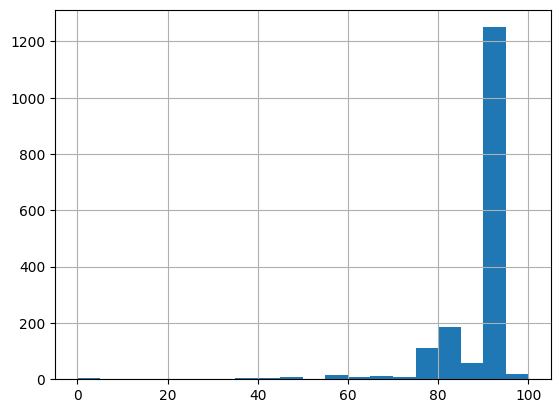

In [32]:
#show histogram of time spent in different gpu load levels
nvidia_log['utilization.gpu(%)'].hist(bins=20)

<Axes: >

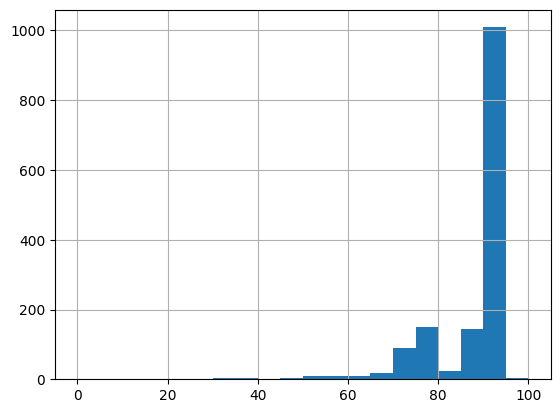

In [33]:
default_nvidia_log['utilization.gpu(%)'].hist(bins=20)

<Axes: >

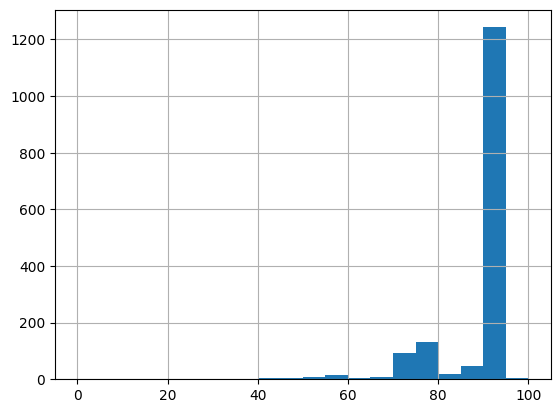

In [34]:
power_nvidia_log['utilization.gpu(%)'].hist(bins=20)

In [35]:
#print total watt-seconds
total_watt_seconds = nvidia_log['watt_seconds'].sum()
print(f"Total watt-seconds (agent): {total_watt_seconds}")
default_total_watt_seconds = default_nvidia_log['watt_seconds'].sum()
print(f"Total watt-seconds (default): {default_total_watt_seconds}")
power_total_watt_seconds = power_nvidia_log['watt_seconds'].sum()
print(f"Total watt-seconds (power): {power_total_watt_seconds}")

Total watt-seconds (agent): 88355.80759
Total watt-seconds (default): 112283.80769
Total watt-seconds (power): 102963.80493


In [36]:
#print total tokens
total_tokens = inference_load['TotalTokens'].sum()
print(f"Total tokens (agent): {total_tokens}")
default_total_tokens = default_inference_load['TotalTokens'].sum()
print(f"Total tokens (default): {default_total_tokens}")
power_total_tokens = power_inference_load['TotalTokens'].sum()
print(f"Total tokens (power): {power_total_tokens}")

Total tokens (agent): 15326
Total tokens (default): 15727
Total tokens (power): 15410


In [37]:
#create a table with columns for total time, total watt-seconds, total tokens and tokens per watt-second and tokens per second
summary = pd.DataFrame(columns=['total_time', 'total_watt_seconds', 'total_tokens', 'tokens_per_watt_second', 'tokens_per_second'])
summary.loc['agent'] = [total_time, total_watt_seconds, total_tokens, total_tokens/total_watt_seconds, total_tokens/total_time.total_seconds()]
summary.loc['default'] = [default_total_time, default_total_watt_seconds, default_total_tokens, default_total_tokens/default_total_watt_seconds, default_total_tokens/default_total_time.total_seconds()]
summary.loc['power' + power_limit] = [power_total_time, power_total_watt_seconds, power_total_tokens, power_total_tokens/power_total_watt_seconds, power_total_tokens/power_total_time.total_seconds()] 
summary


,total_time,total_watt_seconds,total_tokens,tokens_per_watt_second,tokens_per_second
agent,0 days 00:03:47.973000,88355.80759,15326,0.173458,67.227259
default,0 days 00:03:29.311000,112283.80769,15727,0.140065,75.136997
power70,0 days 00:03:45.106000,102963.80493,15410,0.149664,68.456638


In [38]:
#calculate percent diff in total_watt_seconds and tokens_per_second
percent_diff_total_watt_seconds = (total_watt_seconds - default_total_watt_seconds) / total_watt_seconds * 100
percent_diff_tokens_per_second = (summary.loc['agent']['tokens_per_second'] - summary.loc['default']['tokens_per_second']) / summary.loc['default']['tokens_per_second'] * 100
percent_diff_tokens_per_watt_second = (summary.loc['agent']['tokens_per_watt_second'] - summary.loc['default']['tokens_per_watt_second']) / summary.loc['default']['tokens_per_watt_second'] * 100
print(f"Percent diff in agent from default in total watt-seconds (don't take too much from this as this isn't normalized): {percent_diff_total_watt_seconds}")
print(f"Percent diff in agent from default in tokens per second: {percent_diff_tokens_per_second}")
print(f"Percent diff in agent from default in tokens per watt-second: {percent_diff_tokens_per_watt_second}")

Percent diff in agent from default in total watt-seconds (don't take too much from this as this isn't normalized): -27.081411796985428
Percent diff in agent from default in tokens per second: -10.52708790191209
Percent diff in agent from default in tokens per watt-second: 23.84114689391483


In [39]:
#calculate percent diff in total_watt_seconds and tokens_per_second
power_key = 'power' + power_limit
percent_diff_total_watt_seconds = (total_watt_seconds - power_total_watt_seconds) / total_watt_seconds * 100
percent_diff_tokens_per_second = (summary.loc['agent']['tokens_per_second'] - summary.loc[power_key]['tokens_per_second']) / summary.loc[power_key]['tokens_per_second'] * 100
percent_diff_tokens_per_watt_second = (summary.loc['agent']['tokens_per_watt_second'] - summary.loc[power_key]['tokens_per_watt_second']) / summary.loc[power_key]['tokens_per_watt_second'] * 100
print(f"Percent diff in agent from power limit in total watt-seconds (don't take too much from this as this isn't normalized): {percent_diff_total_watt_seconds}")
print(f"Percent diff in agent from power limit in tokens per second: {percent_diff_tokens_per_second}")
print(f"Percent diff in agent from power limit in tokens per watt-second: {percent_diff_tokens_per_watt_second}")

Percent diff in agent from power limit in total watt-seconds (don't take too much from this as this isn't normalized): -16.533149023758476
Percent diff in agent from power limit in tokens per second: -1.7958504387365486
Percent diff in agent from power limit in tokens per watt-second: 15.897926147834026


In [40]:
#calculate percent diff in total_watt_seconds and tokens_per_second
power_key = 'power' + power_limit
percent_diff_total_watt_seconds = (default_total_watt_seconds - power_total_watt_seconds) / total_watt_seconds * 100
percent_diff_tokens_per_second = (summary.loc[power_key]['tokens_per_second'] - summary.loc['default']['tokens_per_second']) / summary.loc['default']['tokens_per_second'] * 100
percent_diff_tokens_per_watt_second = (summary.loc[power_key]['tokens_per_watt_second'] - summary.loc['default']['tokens_per_watt_second']) / summary.loc['default']['tokens_per_watt_second'] * 100
print(f"Percent diff in power limit from default total watt-seconds (don't take too much from this as this isn't normalized): {percent_diff_total_watt_seconds}")
print(f"Percent diff in power limit from default in tokens per second: {percent_diff_tokens_per_second}")
print(f"Percent diff in power limit from deafult in tokens per watt-second: {percent_diff_tokens_per_watt_second}")

Percent diff in power limit from default total watt-seconds (don't take too much from this as this isn't normalized): 10.548262773226952
Percent diff in power limit from default in tokens per second: -8.8909048163272
Percent diff in power limit from deafult in tokens per watt-second: 6.85363492695184


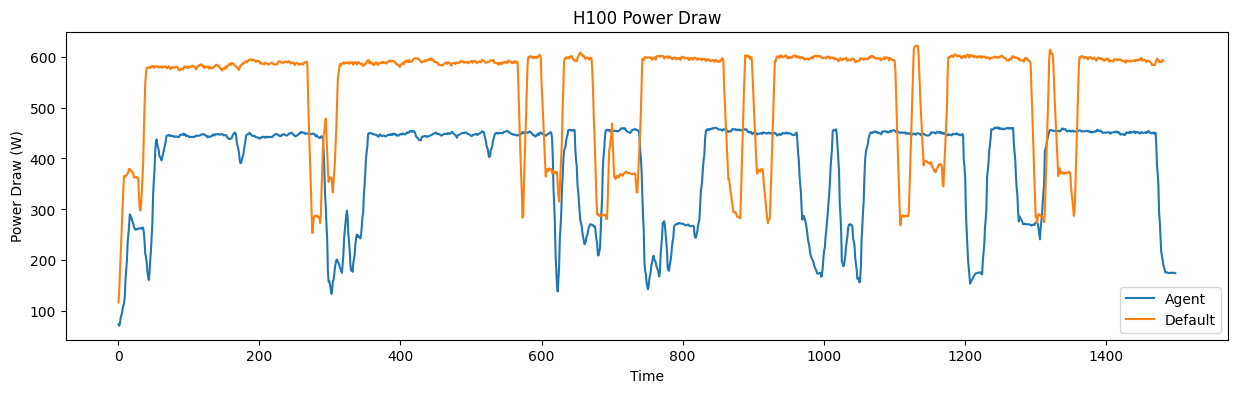

In [85]:
#graph over time the power draw of each series, the tokens/watt-sec and tokens/sec
len = 1500
nvidia_log.reset_index()[:len]['power.draw(W)'].plot()
default_nvidia_log.reset_index()[:len]['power.draw(W)'].plot()
#power_nvidia_log.reset_index()[:len]['power.draw(W)'].plot()

#add labels
import matplotlib.pyplot as plt
plt.xlabel('Time')
plt.ylabel('Power Draw (W)')
plt.title('H100 Power Draw')
plt.legend(['Agent', 'Default'])
plt.gcf().set_size_inches(15, 4)
plt.show()


Mean power draw (agent): 387.5588193624557
Mean power draw (default): 535.8494066082266
Std power draw (agent): 99.37580217729473
Std power draw (default): 102.75264109571235


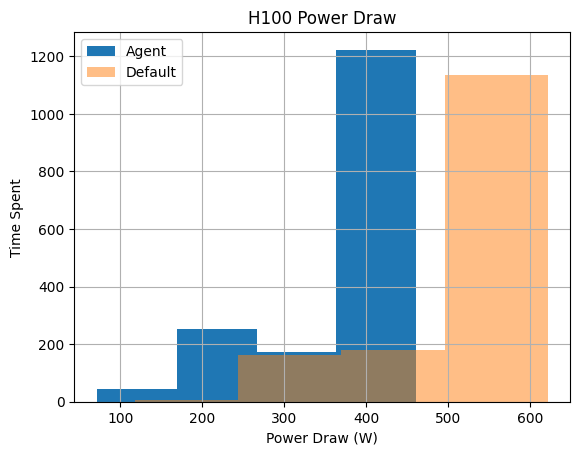

In [100]:
#generate the mean and std of the power draw
print(f"Mean power draw (agent): {nvidia_log['power.draw(W)'].mean()}")
print(f"Mean power draw (default): {default_nvidia_log['power.draw(W)'].mean()}")

print(f"Std power draw (agent): {nvidia_log['power.draw(W)'].std()}")
print(f"Std power draw (default): {default_nvidia_log['power.draw(W)'].std()}")

#generate histogram of time spent in each quartile
nvidia_log['power.draw(W)'].hist(bins=4)
default_nvidia_log['power.draw(W)'].hist(bins=4, alpha=0.5)
#generate labels
plt.xlabel('Power Draw (W)')
plt.ylabel('Time Spent')
plt.title('H100 Power Draw')
#legend
plt.legend(['Agent', 'Default'])




In [42]:
#for each start/end time in inference load sum the watt-seconds in nvidia log
watt_seconds = []
for index, row in inference_load.iterrows():
    start_time = row['StartTime']
    end_time = row['EndTime']
    watt_seconds.append(nvidia_log[(nvidia_log['timestamp'] >= start_time) & (nvidia_log['timestamp'] <= end_time)]['watt_seconds'].sum())
inference_load['watt_seconds'] = watt_seconds

#for each start/end time in inference load sum the watt-seconds in nvidia log
default_watt_seconds = []
for index, row in default_inference_load.iterrows():
    start_time = row['StartTime']
    end_time = row['EndTime']
    default_watt_seconds.append(default_nvidia_log[(default_nvidia_log['timestamp'] >= start_time) & (default_nvidia_log['timestamp'] <= end_time)]['watt_seconds'].sum())
default_inference_load['watt_seconds'] = default_watt_seconds

#for each start/end time in inference load sum the watt-seconds in nvidia log
power_watt_seconds = []
for index, row in power_inference_load.iterrows():
    start_time = row['StartTime']
    end_time = row['EndTime']
    power_watt_seconds.append(power_nvidia_log[(power_nvidia_log['timestamp'] >= start_time) & (power_nvidia_log['timestamp'] <= end_time)]['watt_seconds'].sum())
power_inference_load['watt_seconds'] = power_watt_seconds

In [43]:
#plot tokens per watt-seconds vs time
inference_load['TokensPerWattSecond'] = inference_load['TotalTokens'] / inference_load['watt_seconds']
default_inference_load['TokensPerWattSecond'] = default_inference_load['TotalTokens'] / default_inference_load['watt_seconds']
power_inference_load['TokensPerWattSecond'] = power_inference_load['TotalTokens'] / power_inference_load['watt_seconds']


In [44]:
nvidia_log.set_index('timestamp', inplace=True)
default_nvidia_log.set_index('timestamp', inplace=True)
power_nvidia_log.set_index('timestamp', inplace=True)

In [45]:
nvidia_log['TokensPerWattSecond'] = nvidia_log.index.map(lambda x: inference_load[(inference_load['StartTime'] <= x) & (inference_load['EndTime'] >= x)]['TokensPerWattSecond'].sum())
default_nvidia_log['TokensPerWattSecond'] = default_nvidia_log.index.map(lambda x: default_inference_load[(default_inference_load['StartTime'] <= x) & (default_inference_load['EndTime'] >= x)]['TokensPerWattSecond'].sum())
power_nvidia_log['TokensPerWattSecond'] = power_nvidia_log.index.map(lambda x: power_inference_load[(power_inference_load['StartTime'] <= x) & (power_inference_load['EndTime'] >= x)]['TokensPerWattSecond'].sum())

In [46]:
nvidia_log['TokensPerSecond'] = nvidia_log.index.map(lambda x: inference_load[(inference_load['StartTime'] <= x) & (inference_load['EndTime'] >= x)]['TokensPerSecond'].mean())
default_nvidia_log['TokensPerSecond'] = default_nvidia_log.index.map(lambda x: default_inference_load[(default_inference_load['StartTime'] <= x) & (default_inference_load['EndTime'] >= x)]['TokensPerSecond'].mean())
power_nvidia_log['TokensPerSecond'] = power_nvidia_log.index.map(lambda x: power_inference_load[(power_inference_load['StartTime'] <= x) & (power_inference_load['EndTime'] >= x)]['TokensPerSecond'].mean())


In [47]:
import matplotlib.pyplot as plt

TypeError: 'int' object is not callable

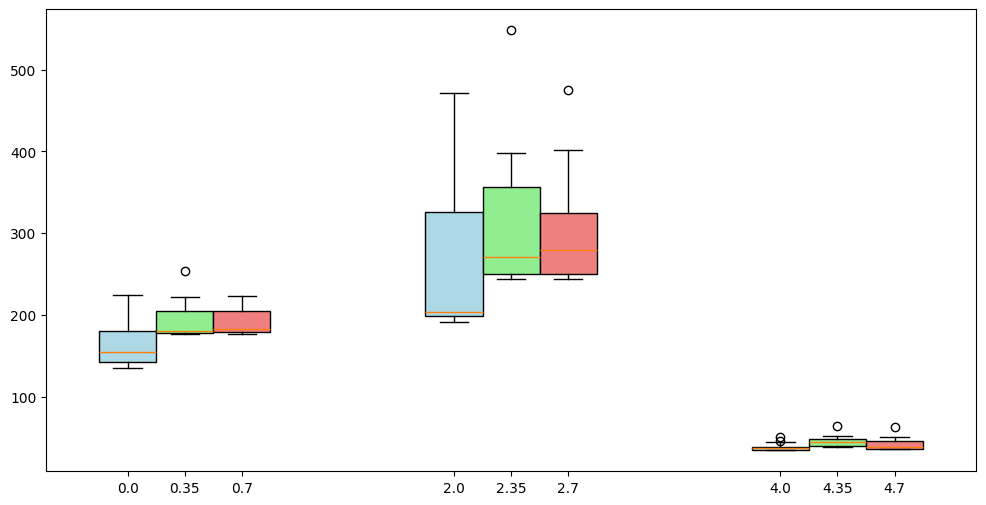

In [48]:
models = inference_load['Model'].unique()

# Prepare data for each method from both datasets
data = []
positions = []
labels = []
width = 0.35  # Width of each boxplot

# Generate positions for boxplots
for i, model in enumerate(models):
    # Data for the current method
    data1 = inference_load[inference_load['Model'] == model]['TokensPerSecond']
    data2 = default_inference_load[default_inference_load['Model'] == model]['TokensPerSecond']
    data3 = power_inference_load[power_inference_load['Model'] == model]['TokensPerSecond']
    
    data.extend([data1, data2, data3])
    
    # Positions for the boxplots
    positions.extend([i * 2, i * 2 + width, i * 2 + 2 * width])
    
    # Labels
    #labels.append(model)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot boxplots with specified positions and widths
bp = ax.boxplot(data, positions=positions, widths=width, patch_artist=True)

# Customize boxplot appearance
# colors = ['lightblue', 'lightgreen', 'lightcoral'] 
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)
    
# Customize boxplot appearance
colors = ['lightblue', 'lightgreen', 'lightcoral']
for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor(colors[i % 3])

ticks = [(i * 2 + width) for i in range(len(list(models)))]
ax.set_xticks(ticks)
ax.set_xticklabels(models, rotation=45)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightblue', label='Agent'),
    Patch(facecolor='lightgreen', label='Default'),
    Patch(facecolor='lightcoral', label='Powercap at 70%')
]
ax.legend(handles=legend_elements, loc='upper left')

# Set titles and labels
ax.set_title('Tokens per Second Comparison by Model')
ax.set_xlabel('Model')
ax.set_ylabel('Tokens per Second')

plt.tight_layout()
plt.show()

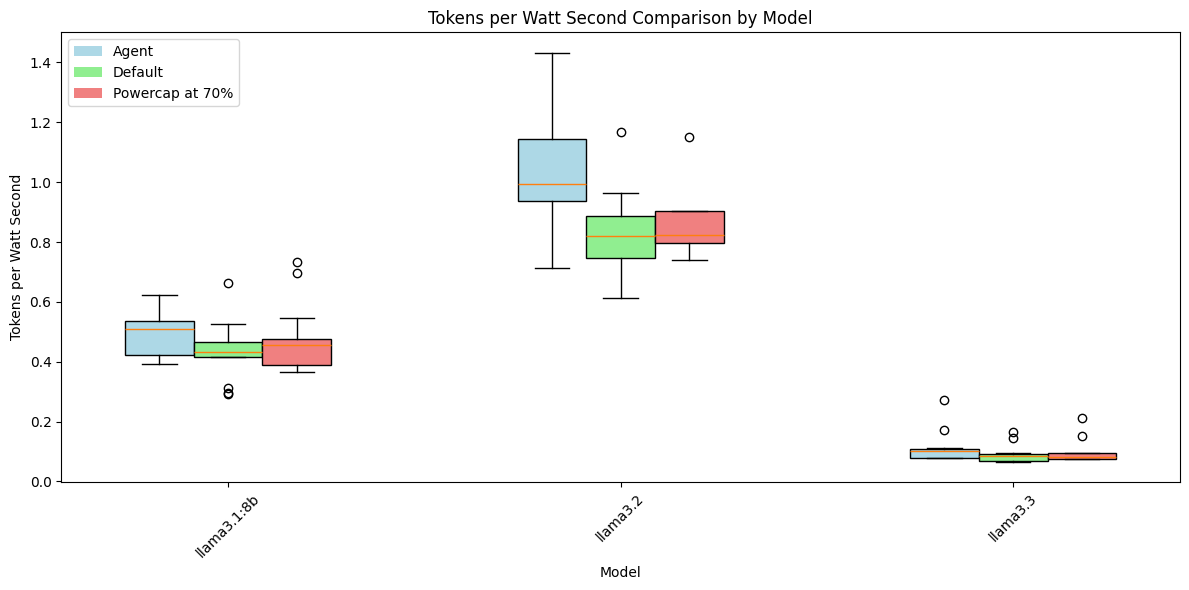

In [39]:
#now do boxplots of tokens per watt-second
models = inference_load['Model'].unique()

# Prepare data for each method from both datasets
data = []
positions = []
labels = []
width = 0.35  # Width of each boxplot

# Generate positions for boxplots
for i, model in enumerate(models):
    # Data for the current method
    data1 = inference_load[inference_load['Model'] == model]['TokensPerWattSecond']
    data2 = default_inference_load[default_inference_load['Model'] == model]['TokensPerWattSecond']
    data3 = power_inference_load[power_inference_load['Model'] == model]['TokensPerWattSecond']
    
    data.extend([data1, data2, data3])
    
    # Positions for the boxplots
    positions.extend([i * 2, i * 2 + width, i * 2 + 2 * width])
    
    # Labels
    #labels.append(model)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot boxplots with specified positions and widths
bp = ax.boxplot(data, positions=positions, widths=width, patch_artist=True)

# Customize boxplot appearance
# colors = ['lightblue', 'lightgreen', 'lightcoral'] 
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)
    
# Customize boxplot appearance
colors = ['lightblue', 'lightgreen', 'lightcoral']
for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor(colors[i % 3])

ticks = [(i * 2 + width) for i in range(len(list(models)))]
ax.set_xticks(ticks)
ax.set_xticklabels(models, rotation=45)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightblue', label='Agent'),
    Patch(facecolor='lightgreen', label='Default'),
    Patch(facecolor='lightcoral', label='Powercap at 70%')
]
ax.legend(handles=legend_elements, loc='upper left')

# Set titles and labels
ax.set_title('Tokens per Watt Second Comparison by Model')
ax.set_xlabel('Model')
ax.set_ylabel('Tokens per Watt Second')

plt.tight_layout()
plt.show()

C:\Users\scott\AppData\Local\Temp\ipykernel_11276\987706958.py:24: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x, line, 'r--', linestyle='--', label='Fit Line (Agent)')
C:\Users\scott\AppData\Local\Temp\ipykernel_11276\987706958.py:32: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x_d, line_d, 'g--', linestyle='-.', label='Fit Line (Default)')


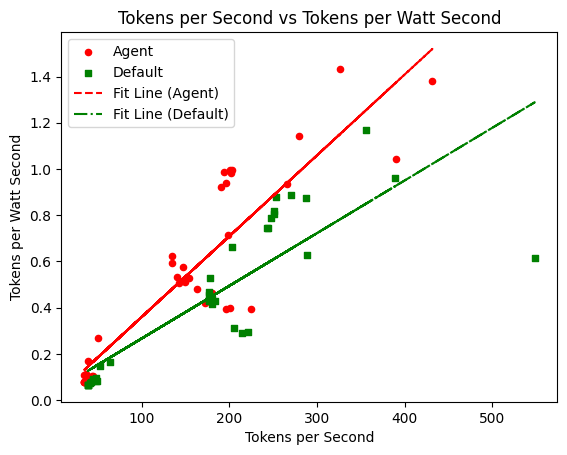

In [92]:
# Replace inf with NaN
inference_load['TokensPerWattSecond'].replace([np.inf, -np.inf], np.nan, inplace=True)
default_inference_load['TokensPerWattSecond'].replace([np.inf, -np.inf], np.nan, inplace=True)
power_inference_load['TokensPerWattSecond'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
inference_load.dropna(subset=['TokensPerWattSecond'], inplace=True)
default_inference_load.dropna(subset=['TokensPerWattSecond'], inplace=True)
power_inference_load.dropna(subset=['TokensPerWattSecond'], inplace=True)

# Plot scatter plots
fig, ax = plt.subplots()
inference_load.plot.scatter(x='TokensPerSecond', y='TokensPerWattSecond', ax=ax, c='r', marker='o', label='Agent')
default_inference_load.plot.scatter(x='TokensPerSecond', y='TokensPerWattSecond', ax=ax, c='g', marker='s', label='Default')
#power_inference_load.plot.scatter(x='TokensPerSecond', y='TokensPerWattSecond', ax=ax, c='b', label='Powercap at 70%')

# Generate fit line as dashed
x = inference_load['TokensPerSecond']
y = inference_load['TokensPerWattSecond']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, 'r--', linestyle='--', label='Fit Line (Agent)')

x_d = default_inference_load['TokensPerSecond']
y_d = default_inference_load['TokensPerWattSecond']

# Perform linear regression
slope_d, intercept_d, r_value_d, p_value_d, std_err_d = stats.linregress(x_d, y_d)
line_d = slope_d * x_d + intercept_d
plt.plot(x_d, line_d, 'g--', linestyle='-.', label='Fit Line (Default)')

x_p = power_inference_load['TokensPerSecond']
y_p = power_inference_load['TokensPerWattSecond']

# Perform linear regression
slope_p, intercept_p, r_value_p, p_value_p, std_err_p = stats.linregress(x_p, y_p)
line_p = slope_p * x_p + intercept_p
# plt.plot(x_p, line_p, 'b--', label='Fit Line (Powercap 70%)')

plt.xlabel('Tokens per Second')
plt.ylabel('Tokens per Watt Second')
plt.title('Tokens per Second vs Tokens per Watt Second')
# Add legend
plt.legend()

# Show plot
plt.show()

In [77]:
inference_load.head()

,StartTime,EndTime,TotalTokens,TotalDuration(seconds),TokensPerSecond,LongOrShortPrompt,Model,watt_seconds,TokensPerWattSecond
0,2024-12-16 17:08:05.058,2024-12-16 17:08:09.836,630,4.686606,134.425630,Long,llama3.1:8b,1012.88362,0.621987
1,2024-12-16 17:08:09.951,2024-12-16 17:08:10.055,43,0.099634,431.579440,Short,llama3.2,31.13484,1.381089
2,2024-12-16 17:08:10.063,2024-12-16 17:08:43.887,1483,33.811172,43.861244,Long,llama3.3,14502.31473,0.102260
3,2024-12-16 17:08:44.003,2024-12-16 17:08:44.116,22,0.109637,200.661580,Short,llama3.1:8b,55.01545,0.399888
4,2024-12-16 17:08:44.121,2024-12-16 17:08:47.265,598,3.137349,190.606810,Long,llama3.2,648.38639,0.922290


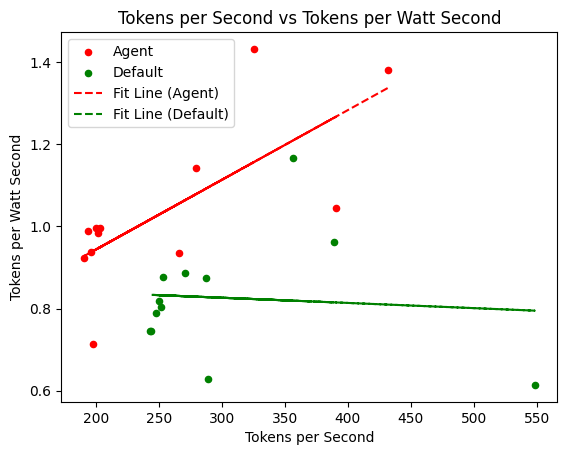

In [83]:
inference_model_load = inference_load[inference_load['Model'] == 'llama3.2']
default_inference_model_load = default_inference_load[default_inference_load['Model'] == 'llama3.2']
power_inference_model_load = power_inference_load[power_inference_load['Model'] == 'llama3.2']
# Plot scatter plots
fig, ax = plt.subplots()
inference_model_load.plot.scatter(x='TokensPerSecond', y='TokensPerWattSecond', ax=ax, c='r', label='Agent')
default_inference_model_load.plot.scatter(x='TokensPerSecond', y='TokensPerWattSecond', ax=ax, c='g', label='Default')
#power_inference_model_load.plot.scatter(x='TokensPerSecond', y='TokensPerWattSecond', ax=ax, c='b', label='Powercap at 70%')

# Generate fit line as dashed
x = inference_model_load['TokensPerSecond']
y = inference_model_load['TokensPerWattSecond']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, 'r--', label='Fit Line (Agent)')

x_d = default_inference_model_load['TokensPerSecond']
y_d = default_inference_model_load['TokensPerWattSecond']

# Perform linear regression
slope_d, intercept_d, r_value_d, p_value_d, std_err_d = stats.linregress(x_d, y_d)
line_d = slope_d * x_d + intercept_d
plt.plot(x_d, line_d, 'g--', label='Fit Line (Default)')

x_p = power_inference_model_load['TokensPerSecond']
y_p = power_inference_model_load['TokensPerWattSecond']

# Perform linear regression
# slope_p, intercept_p, r_value_p, p_value_p, std_err_p = stats.linregress(x_p, y_p)
# line_p = slope_p * x_p + intercept_p
# plt.plot(x_p, line_p, 'b--', label='Fit Line (Powercap 70%)')

plt.xlabel('Tokens per Second')
plt.ylabel('Tokens per Watt Second')
plt.title('Tokens per Second vs Tokens per Watt Second')
# Add legend
plt.legend()

# Show plot
plt.show()

In [58]:
y

0     0.621987
1     1.381089
2     0.102260
3     0.399888
4     0.922290
5     0.170301
6     0.593183
7          inf
8     0.102763
9     0.394543
10    0.713022
11    0.101775
12    0.511268
13    0.936148
14    0.086222
15    0.392114
16    0.938047
17    0.270700
18    0.575915
19    1.432432
20    0.078654
21    0.481301
22    0.996819
23    0.112647
24    0.508383
25    0.995350
26    0.079421
27    0.421467
28    0.988666
29    0.089059
30    0.530047
31    1.044796
32    0.078366
33    0.464579
34    0.983292
35    0.107069
36    0.534684
37    1.143306
38    0.079088
Name: TokensPerWattSecond, dtype: float64

In [115]:
inference_load

,StartTime,EndTime,TotalTokens,TotalDuration(seconds),TokensPerSecond,LongOrShortPrompt,Model
0,2024-12-16 17:08:05.058,2024-12-16 17:08:09.836,630,4.686606,134.425630,Long,llama3.1:8b
1,2024-12-16 17:08:09.951,2024-12-16 17:08:10.055,43,0.099634,431.579440,Short,llama3.2
2,2024-12-16 17:08:10.063,2024-12-16 17:08:43.887,1483,33.811172,43.861244,Long,llama3.3
3,2024-12-16 17:08:44.003,2024-12-16 17:08:44.116,22,0.109637,200.661580,Short,llama3.1:8b
4,2024-12-16 17:08:44.121,2024-12-16 17:08:47.265,598,3.137349,190.606810,Long,llama3.2
5,2024-12-16 17:08:47.317,2024-12-16 17:08:48.225,35,0.904426,38.698560,Short,llama3.3
6,2024-12-16 17:08:48.228,2024-12-16 17:08:50.268,274,2.035513,134.609770,Long,llama3.1:8b
7,2024-12-16 17:08:50.285,2024-12-16 17:08:50.351,30,0.063652,471.315460,Short,llama3.2
8,2024-12-16 17:08:50.353,2024-12-16 17:09:27.626,1682,37.260370,45.141800,Long,llama3.3
9,2024-12-16 17:09:27.690,2024-12-16 17:09:27.795,23,0.102330,224.763840,Short,llama3.1:8b


In [114]:
#inference load has start and end times.  Put each tokens per watt_second in to nvidia_log which is indexed by time by 
#taking tokens-per-second 


,timestamp,index,name,utilization.gpu(%),utilization.memory(%),memory.total(MiB),memory.free(MiB),memory.used(MiB),temperature.gpu(C),gpu.frequency(Ghz),vram.frequency(Ghz),power.limit(W),power.draw(W),time_since_last,watt_seconds
34,2024-12-16 17:08:05.059,0,NVIDIA H100 80GB HBM3,0,0,81559,26053,54943,31,345,2619,700.0,73.71,NaN,NaN
35,2024-12-16 17:08:05.194,0,NVIDIA H100 80GB HBM3,0,0,81559,26053,54943,31,345,2619,700.0,71.51,0.135,9.65385
36,2024-12-16 17:08:05.330,0,NVIDIA H100 80GB HBM3,0,0,81559,26053,54943,31,345,2619,700.0,75.65,0.136,10.28840
37,2024-12-16 17:08:05.472,0,NVIDIA H100 80GB HBM3,67,6,81559,26053,54943,32,345,2619,700.0,86.28,0.142,12.25176
38,2024-12-16 17:08:05.608,0,NVIDIA H100 80GB HBM3,93,9,81559,26053,54943,32,345,2619,700.0,91.16,0.136,12.39776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-12-16 17:11:52.462,0,NVIDIA H100 80GB HBM3,93,55,81559,26053,54943,46,1650,2619,700.0,445.57,0.134,59.70638
1724,2024-12-16 17:11:52.596,0,NVIDIA H100 80GB HBM3,90,53,81559,26053,54943,46,1650,2619,700.0,445.90,0.134,59.75060
1725,2024-12-16 17:11:52.729,0,NVIDIA H100 80GB HBM3,92,54,81559,26053,54943,46,1650,2619,700.0,446.07,0.133,59.32731
1726,2024-12-16 17:11:52.865,0,NVIDIA H100 80GB HBM3,92,54,81559,26053,54943,46,1650,2619,700.0,445.64,0.136,60.60704


In [92]:
nvidia_log

,timestamp,index,name,utilization.gpu(%),utilization.memory(%),memory.total(MiB),memory.free(MiB),memory.used(MiB),temperature.gpu(C),gpu.frequency(Ghz),vram.frequency(Ghz),power.limit(W),power.draw(W),time_since_last,watt_seconds,tokens_per_watt_second
34,2024-12-16 17:08:05.059,0,NVIDIA H100 80GB HBM3,0,0,81559,26053,54943,31,345,2619,700.0,73.71,NaN,NaN,NaN
35,2024-12-16 17:08:05.194,0,NVIDIA H100 80GB HBM3,0,0,81559,26053,54943,31,345,2619,700.0,71.51,0.135,9.65385,10.047805
36,2024-12-16 17:08:05.330,0,NVIDIA H100 80GB HBM3,0,0,81559,26053,54943,31,345,2619,700.0,75.65,0.136,10.28840,50.056374
37,2024-12-16 17:08:05.472,0,NVIDIA H100 80GB HBM3,67,6,81559,26053,54943,32,345,2619,700.0,86.28,0.142,12.25176,9.386407
38,2024-12-16 17:08:05.608,0,NVIDIA H100 80GB HBM3,93,9,81559,26053,54943,32,345,2619,700.0,91.16,0.136,12.39776,53.558062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-12-16 17:11:52.462,0,NVIDIA H100 80GB HBM3,93,55,81559,26053,54943,46,1650,2619,700.0,445.57,0.134,59.70638,NaN
1724,2024-12-16 17:11:52.596,0,NVIDIA H100 80GB HBM3,90,53,81559,26053,54943,46,1650,2619,700.0,445.90,0.134,59.75060,NaN
1725,2024-12-16 17:11:52.729,0,NVIDIA H100 80GB HBM3,92,54,81559,26053,54943,46,1650,2619,700.0,446.07,0.133,59.32731,NaN
1726,2024-12-16 17:11:52.865,0,NVIDIA H100 80GB HBM3,92,54,81559,26053,54943,46,1650,2619,700.0,445.64,0.136,60.60704,NaN


In [61]:
#graph inference load on the same index as power draw
inference_load.reindex(nvidia_log.timestamp)

,StartTime,EndTime,TotalTokens,TotalDuration(seconds),TokensPerSecond,LongOrShortPrompt,Model
timestamp,,,,,,,
2024-12-16 17:08:05.059,NaT,NaT,NaN,NaN,NaN,NaN,NaN
2024-12-16 17:08:05.194,NaT,NaT,NaN,NaN,NaN,NaN,NaN
2024-12-16 17:08:05.330,NaT,NaT,NaN,NaN,NaN,NaN,NaN
2024-12-16 17:08:05.472,NaT,NaT,NaN,NaN,NaN,NaN,NaN
2024-12-16 17:08:05.608,NaT,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-12-16 17:11:52.462,NaT,NaT,NaN,NaN,NaN,NaN,NaN
2024-12-16 17:11:52.596,NaT,NaT,NaN,NaN,NaN,NaN,NaN
2024-12-16 17:11:52.729,NaT,NaT,NaN,NaN,NaN,NaN,NaN


<Axes: >

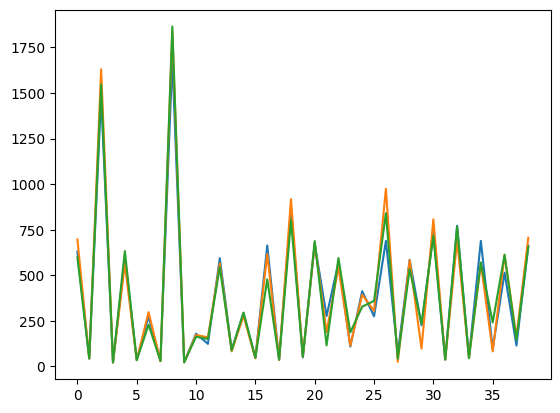

In [56]:
#graph tokens over time
inference_load['TotalTokens'].plot()
default_inference_load['TotalTokens'].plot()
power_inference_load['TotalTokens'].plot()

In [55]:
nvidia_log

,timestamp,index,name,utilization.gpu(%),utilization.memory(%),memory.total(MiB),memory.free(MiB),memory.used(MiB),temperature.gpu(C),gpu.frequency(Ghz),vram.frequency(Ghz),power.limit(W),power.draw(W),time_since_last,watt_seconds
34,2024-12-16 17:08:05.059,0,NVIDIA H100 80GB HBM3,0,0,81559,26053,54943,31,345,2619,700.0,73.71,NaN,NaN
35,2024-12-16 17:08:05.194,0,NVIDIA H100 80GB HBM3,0,0,81559,26053,54943,31,345,2619,700.0,71.51,0.135,9.65385
36,2024-12-16 17:08:05.330,0,NVIDIA H100 80GB HBM3,0,0,81559,26053,54943,31,345,2619,700.0,75.65,0.136,10.28840
37,2024-12-16 17:08:05.472,0,NVIDIA H100 80GB HBM3,67,6,81559,26053,54943,32,345,2619,700.0,86.28,0.142,12.25176
38,2024-12-16 17:08:05.608,0,NVIDIA H100 80GB HBM3,93,9,81559,26053,54943,32,345,2619,700.0,91.16,0.136,12.39776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-12-16 17:11:52.462,0,NVIDIA H100 80GB HBM3,93,55,81559,26053,54943,46,1650,2619,700.0,445.57,0.134,59.70638
1724,2024-12-16 17:11:52.596,0,NVIDIA H100 80GB HBM3,90,53,81559,26053,54943,46,1650,2619,700.0,445.90,0.134,59.75060
1725,2024-12-16 17:11:52.729,0,NVIDIA H100 80GB HBM3,92,54,81559,26053,54943,46,1650,2619,700.0,446.07,0.133,59.32731
1726,2024-12-16 17:11:52.865,0,NVIDIA H100 80GB HBM3,92,54,81559,26053,54943,46,1650,2619,700.0,445.64,0.136,60.60704


In [54]:
#plot tokens per watt-second and tokens per second by joiniing the two dataframes on time
inference_load.reset_index().merge(nvidia_log, left_on='StartTime', right_on='timestamp')['TotalTokens']/nvidia_log['watt_seconds'].head()#.plot()
#nvidia_log.reset_index().merge(inference_load, left_on='timestamp', right_on='StartTime')['TotalTokens']/nvidia_log['watt_seconds'].tail()#.plot()
# default_nvidia_log.reset_index().merge(default_inference_load, left_on='timestamp', right_on='StartTime')['TotalTokens']/default_nvidia_log['watt_seconds'].plot()
# power_nvidia_log.reset_index().merge(power_inference_load, left_on='timestamp', right_on='StartTime')['TotalTokens']/power_nvidia_log['watt_seconds'].plot()


# #add labels
# import matplotlib.pyplot as plt
# plt.xlabel('Time')
# plt.ylabel('Energy (Ws)')
# plt.title('H100 Power Draw Over Time in Varied LLM Inference Workload')
# plt.legend(['agent', 'default', 'power' + power_limit])

34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
dtype: float64